# Explore here

In [1]:
# basics
import os
import shutil
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'pandas'

In [50]:
# Utils
import warnings
warnings.filterwarnings("ignore")

In [51]:
directory = "../data/raw/train"
# def organize(path):
#     os.mkdir(f"{path}/cats", exist_ok = True)
#     os.mkdir(f"{path}/dogs", exist_ok = True)
#     files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
#     for name in files:
#         if "cat" in name:
#             shutil.move(f"{path}/{name}", f"{path}/cats/{name}")
#         elif "dog" in name:
#             shutil.move(f"{path}/{name}", f"{path}/dogs/{name}")

# organize(directory)

In [67]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2, 
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
    )

train_generator = train_datagen.flow_from_directory(
    directory, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = "binary", 
    subset = "training"
)

val_generator = train_datagen.flow_from_directory(
    directory, 
    target_size = (150, 150), 
    batch_size = 32, 
    class_mode = "binary", 
    subset = "validation"
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [53]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

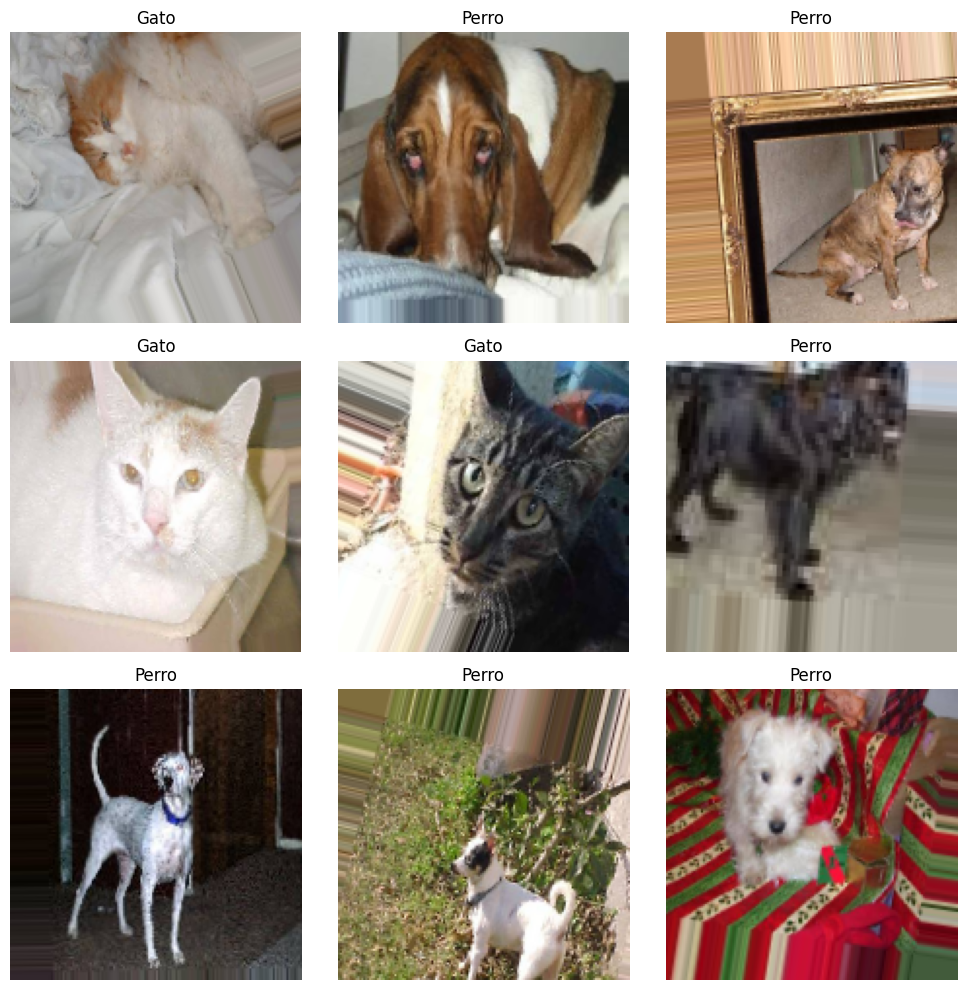

In [68]:
# Check classification in generator
# Obtener un batch del generador
images, labels = next(train_generator)  # primer lote (batch) del generador

# Mostrar 9 imágenes del batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = 'Perro' if labels[i] == 1 else 'Gato'
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [32]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.7831 - loss: 0.4651 - val_accuracy: 0.7168 - val_loss: 0.5680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 259s 414ms/step - accuracy: 0.8728 - loss: 0.3099 - val_accuracy: 0.7186 - val_loss: 0.6054
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 395ms/step - accuracy: 0.9299 - loss: 0.1950 - val_accuracy: 0.7266 - val_loss: 0.7025
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 250s 400ms/step - accuracy: 0.9686 - loss: 0.1064 - val_accuracy: 0.7226 - val_loss: 0.9153
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 411ms/step - accuracy: 0.9839 - loss: 0.0571 - val_accuracy: 0.7230 - val_loss: 1.0988
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 388ms/step - accuracy: 0.9834 - loss: 0.0565 - val_accuracy: 0.7252 - val_loss: 1.2546
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 394ms/step - accuracy: 0.9867 - loss: 0.0534 - val_accuracy: 0.7032 - val_loss: 1.4318
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 242s 387ms/step - accuracy: 0.9893 -

In [37]:
_, accuracy = model.evaluate(val_generator)
print(f"Accuracy en validación: {accuracy:.2f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.7057 - loss: 1.8144
Accuracy en validación: 0.70


In [69]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [70]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [71]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 449s 715ms/step - accuracy: 0.5513 - loss: 0.7314 - val_accuracy: 0.5982 - val_loss: 0.6522
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 474s 758ms/step - accuracy: 0.6304 - loss: 0.6523 - val_accuracy: 0.6492 - val_loss: 0.6272
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 681ms/step - accuracy: 0.6680 - loss: 0.6170